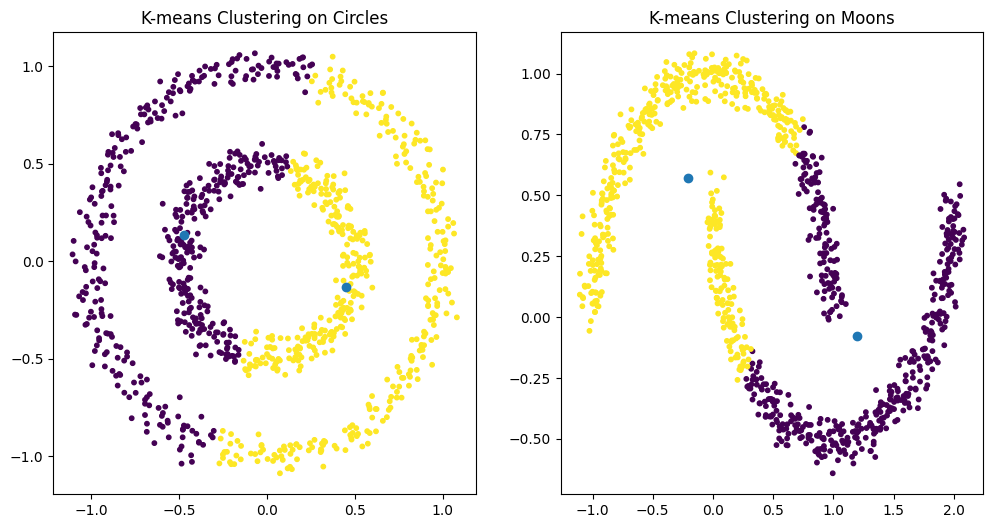

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import KMeans, DBSCAN

X_circles, y_circles = make_circles(n_samples=1000, factor=0.5, noise=0.05)
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05)

kmeans_circles = KMeans(n_clusters=2, random_state=42).fit(X_circles)
kmeans_moons = KMeans(n_clusters=2, random_state=42).fit(X_moons)

y_kmeans_circles = kmeans_circles.predict(X_circles)
y_kmeans_moons = kmeans_moons.predict(X_moons)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(X_circles[:, 0], X_circles[:, 1], c=y_kmeans_circles, cmap='viridis', s=10)
axs[0].plot(kmeans_circles.cluster_centers_[:, 0], kmeans_circles.cluster_centers_[:, 1], 'o')
axs[0].set_title('K-means Clustering on Circles')

axs[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_kmeans_moons, cmap='viridis', s=10)
axs[1].plot(kmeans_moons.cluster_centers_[:, 0], kmeans_moons.cluster_centers_[:, 1], 'o')
axs[1].set_title('K-means Clustering on Moons')

plt.show()


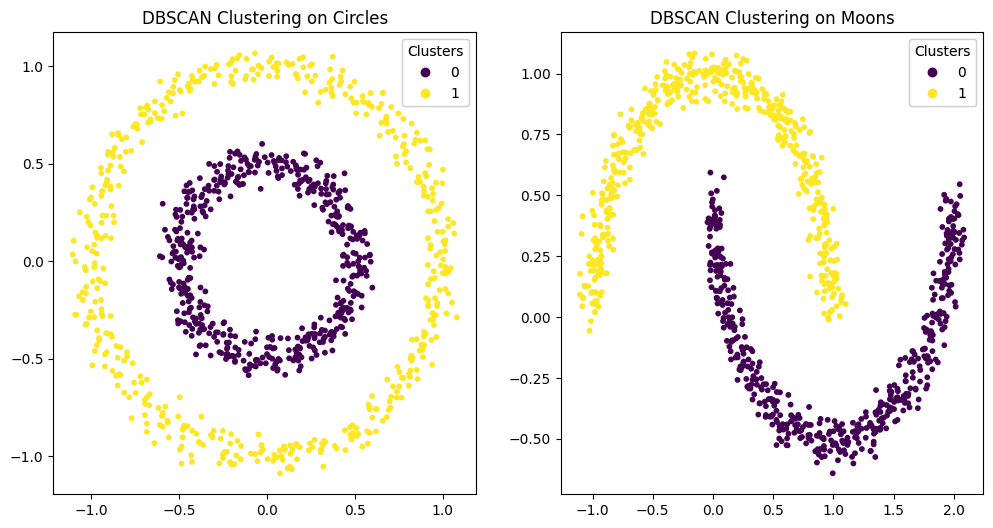

In [2]:
# Density-Based Spatial Clustering of Applications with Noise
dbscan_circles = DBSCAN(eps=0.2, min_samples=5).fit(X_circles)
dbscan_moons = DBSCAN(eps=0.2, min_samples=5).fit(X_moons)

y_dbscan_circles = dbscan_circles.labels_
y_dbscan_moons = dbscan_moons.labels_

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

scatter = axs[0].scatter(X_circles[:, 0], X_circles[:, 1], c=y_dbscan_circles, cmap='viridis', s=10)
axs[0].set_title('DBSCAN Clustering on Circles')
legend1 = axs[0].legend(*scatter.legend_elements(), title="Clusters")
axs[0].add_artist(legend1)

scatter = axs[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_dbscan_moons, cmap='viridis', s=10)
axs[1].set_title('DBSCAN Clustering on Moons')
legend2 = axs[1].legend(*scatter.legend_elements(), title="Clusters")
axs[1].add_artist(legend2)

plt.show()

/Users/madalinamarcu/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/madalinamarcu/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


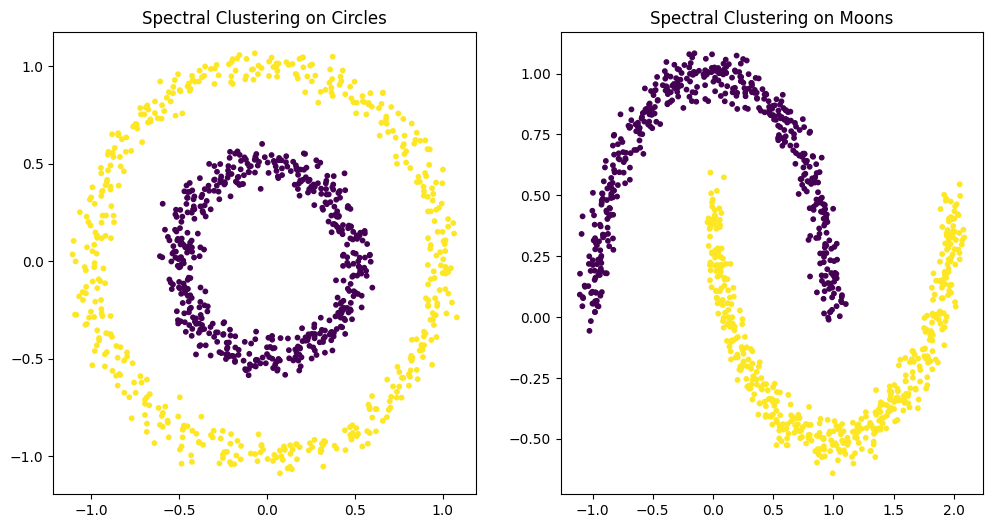

In [3]:
from sklearn.cluster import SpectralClustering


spectral_circles = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans').fit(X_circles)
spectral_moons = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans').fit(X_moons)

y_spectral_circles = spectral_circles.labels_
y_spectral_moons = spectral_moons.labels_

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(X_circles[:, 0], X_circles[:, 1], c=y_spectral_circles, cmap='viridis', s=10)
axs[0].set_title('Spectral Clustering on Circles')

axs[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_spectral_moons, cmap='viridis', s=10)
axs[1].set_title('Spectral Clustering on Moons')

plt.show()


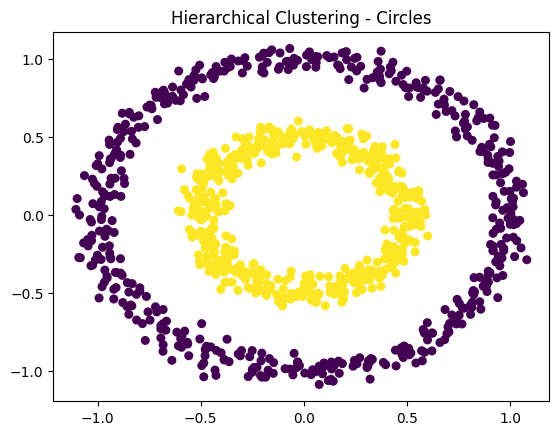

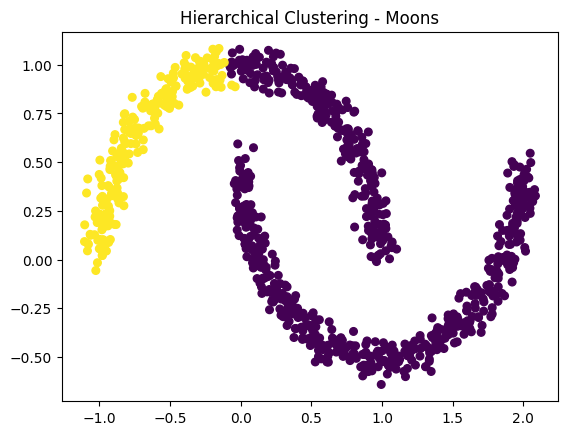

In [4]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_circles = AgglomerativeClustering(n_clusters=2, linkage='single')
hierarchical_moons = AgglomerativeClustering(n_clusters=2)

y_hierarchical_circles = hierarchical_circles.fit_predict(X_circles)
y_hierarchical_moons = hierarchical_moons.fit_predict(X_moons)

def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
    plt.title(title)
    plt.show()

plot_clusters(X_circles, y_hierarchical_circles, "Hierarchical Clustering - Circles")
plot_clusters(X_moons, y_hierarchical_moons, "Hierarchical Clustering - Moons")


In [5]:
!pip install scikit-fuzzy

You should consider upgrading via the '/Users/madalinamarcu/.pyenv/versions/3.10.5/bin/python3.10 -m pip install --upgrade pip' command.


In [6]:
from sklearn.datasets import make_blobs
import skfuzzy as fuzz

X, Y = make_blobs(n_samples=300, centers=2, cluster_std=3, random_state=42)

kmeans_labels = KMeans(n_clusters=2, random_state=0).fit_predict(X)

X_transposed = X.T  
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    X_transposed, c=2, m=2, error=0.005, maxiter=10000
)
fcm_labels = np.argmax(u, axis=0)
membership_probs = u.T  

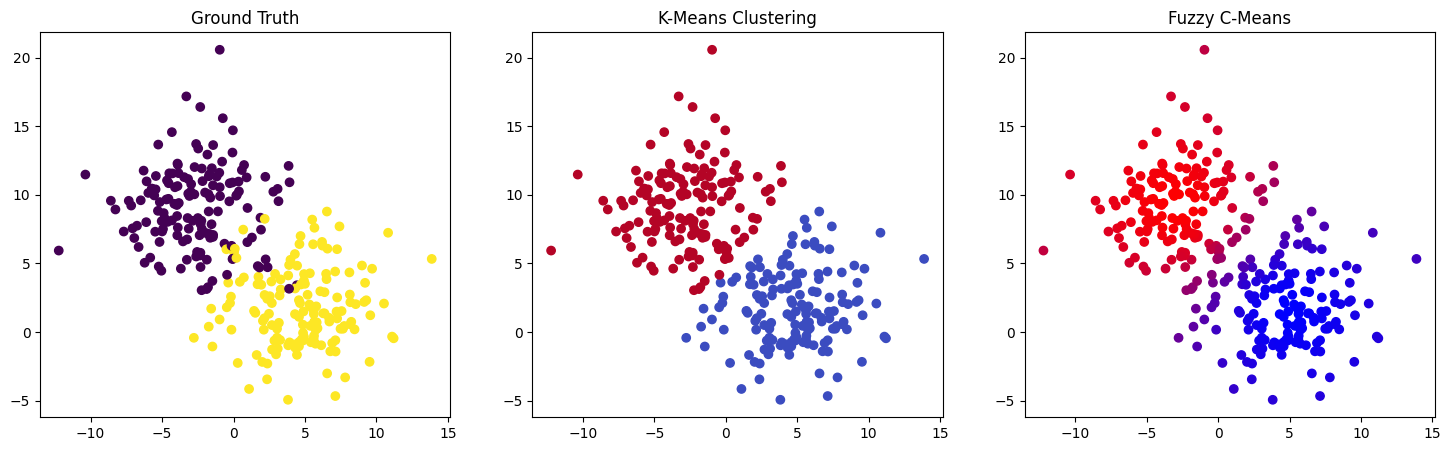

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')
axs[0].set_title("Ground Truth")

axs[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='coolwarm')
axs[1].set_title("K-Means Clustering")

colors = membership_probs @ np.array([[1, 0, 0], [0, 0, 1]])
axs[2].scatter(X[:, 0], X[:, 1], c=colors)
axs[2].set_title("Fuzzy C-Means")

plt.show()